In [115]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
data = pd.read_csv("jsed_curve_fit.csv"); data.head()

,x,y
0,1658.845908,332.613305
1,1645.428049,327.999507
2,1631.959513,325.608188
3,1618.488526,324.971874
4,1605.036794,324.247557


In [118]:
data.describe()

,x,y
count,197.000000,197.000000
mean,640.347605,213.647585
std,502.637343,67.680877
min,0.000000,77.671250
25%,178.475672,166.175834
50%,563.620186,211.905506
75%,1056.001593,269.394993
max,1658.845908,332.613305


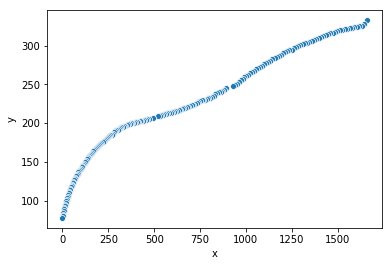

In [119]:
sns.scatterplot(x=data.x, y=data.y)

In [120]:
x1 = data.sort_values('x')[data.x < 100]; x1.tail()

,x,y
167,83.090920,134.227466
166,87.190385,136.649343
165,91.362564,138.241156
164,95.606394,139.075286
163,99.921129,140.548432


In [121]:
linear_model = LinearRegression()
linear_model.fit(pd.DataFrame(x1.x), x1.y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
line_x1 = linear_model.predict(pd.DataFrame(x1.x))

In [123]:
r2_score(x1.y, line_x1)

0.9705323774367596

In [124]:
print(linear_model.coef_, linear_model.intercept_)

[0.61924872] 84.8329440742547


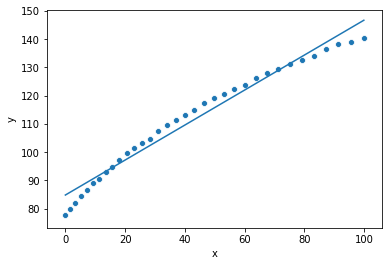

In [125]:
sns.lineplot(x=x1.x, y=line_x1)
sns.scatterplot(x=x1.x, y=x1.y)

In [126]:
x2 = data.sort_values('x')[data.x >= 100]; x2.head()

,x,y
162,104.305085,142.929690
161,108.752353,144.500418
160,113.254040,146.077952
159,117.827547,147.641075
158,122.478439,149.173611


In [127]:
linear_model2 = LinearRegression()
linear_model2.fit(pd.DataFrame(x2.x), x2.y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
line_x2 = linear_model2.predict(pd.DataFrame(x2.x))

In [129]:
r2_score(x2.y, line_x2)

0.9877599938394108

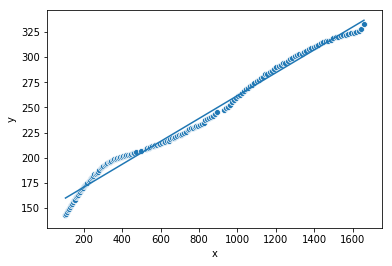

In [130]:
sns.lineplot(x=x2.x, y=line_x2)
sns.scatterplot(x=x2.x, y=x2.y)

In [131]:
r1 = []
r2 = []
model1 = []
model2 = []

splits = range(1, 101)

for split in splits:
    x1 = data.sort_values('x')[data.x < split]
    x2 = data.sort_values('x')[data.x >= split]
    
    linear_model1 = LinearRegression()
    linear_model1.fit(pd.DataFrame(x1.x), x1.y)
    model1.append(linear_model1)
    
    linear_model2 = LinearRegression()
    linear_model2.fit(pd.DataFrame(x2.x), x2.y)
    model2.append(linear_model2)
    
    line_x1 = linear_model1.predict(pd.DataFrame(x1.x))
    line_x2 = linear_model2.predict(pd.DataFrame(x2.x))
    
    r1.append(r2_score(x1.y, line_x1))
    r2.append(r2_score(x2.y, line_x2))

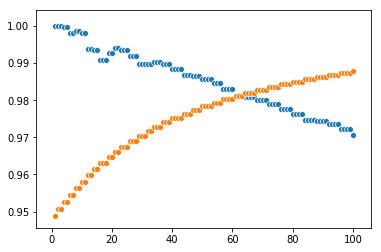

In [132]:
sns.scatterplot(x=splits, y=r1)
sns.scatterplot(x=splits, y=r2)

In [133]:
for i in splits:
    if r1[i-1] < r2[i-1]:
        print(i - 1)
        break

63


In [134]:
piece1 = model1[63]
piece2 = model2[63]

In [136]:
piece1.predict(pd.DataFrame(data.x[data.x < 64]))

array([129.66954983, 126.94415226, 124.27941003, 121.67588344,
       119.13393142, 116.65432275, 114.2371286 , 111.88423237,
       109.5959489 , 107.37271172, 105.21544788, 103.12563779,
       101.10385421,  99.15086465,  97.26701465,  95.45320281,
        93.70289028,  92.00330389,  90.36342253,  88.78704082,
        87.27634871,  85.8329165 ,  84.45801154,  83.15301685,
        81.9205041 ])

In [138]:
data['predictions'] = 0

In [139]:
data['predictions'][data.x < 64] = piece1.predict(pd.DataFrame(data.x[data.x < 64]))

In [144]:
data['predictions'][data.x >= 64] = piece2.predict(pd.DataFrame(data.x[data.x >= 64]))

In [145]:
r2_score(data.y, data.predictions)

0.9889560235446792